In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/content/Titanic-Dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('/content/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_null = round(data.isna().sum() / data.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [5]:
data.duplicated().sum()

0

In [6]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [7]:
data.drop('Cabin', axis=1,inplace=True)

In [8]:
data.dropna(inplace=True)

In [9]:
data_null = round(data.isna().sum() / data.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
data.describe(include = 'all').round(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,889.0,889.00,889.00,889,889,889.00,889.00,889.00,889,889.00,889
unique,NaN,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.0,0.38,2.31,NaN,NaN,29.65,0.52,0.38,NaN,32.10,NaN
std,257.0,0.49,0.83,NaN,NaN,12.97,1.10,0.81,NaN,49.70,NaN
min,1.0,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN
25%,224.0,0.00,2.00,NaN,NaN,22.00,0.00,0.00,NaN,7.90,NaN
50%,446.0,0.00,3.00,NaN,NaN,29.70,0.00,0.00,NaN,14.45,NaN
75%,668.0,1.00,3.00,NaN,NaN,35.00,1.00,0.00,NaN,31.00,NaN


In [17]:
print(data.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [18]:
data_numeric = data.select_dtypes(include=[float, int])


In [19]:
correlation_matrix = data_numeric.corr()
print(correlation_matrix)


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030300 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.074673 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.327954  0.081656  0.016824   
Age             0.030300 -0.074673 -0.327954  1.000000 -0.231875 -0.178232   
SibSp          -0.057686 -0.034040  0.081656 -0.231875  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.178232  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.088604  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.088604  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


In [21]:
print(data.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [23]:
for col in ['correct_column_name1', 'correct_column_name2']:
    if col in data.columns:
        print(f"Column '{col}' exists and will be dropped.")
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")


Column 'correct_column_name1' does not exist in the DataFrame.
Column 'correct_column_name2' does not exist in the DataFrame.


In [24]:
data = data.drop(['correct_column_name1', 'correct_column_name2'], axis=1, errors='ignore')


In [26]:
data.columns = data.columns.str.strip()
# Check column names
print("Columns in the DataFrame:", data.columns)

# Remove unwanted columns safely
data = data.drop(['correct_column_name1', 'correct_column_name2'], axis=1, errors='ignore')

# Verify columns have been dropped
print("Updated Columns:", data.columns)


Columns in the DataFrame: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Updated Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


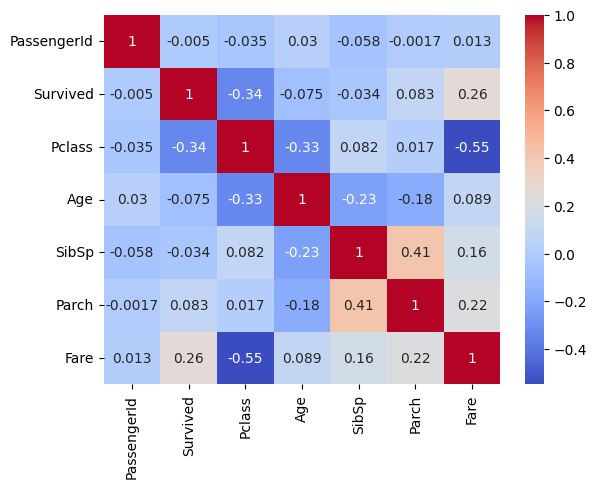

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data_numeric.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [31]:
data["PassengerId"].count()

889

In [34]:
data.columns = data.columns.str.strip()


In [36]:
print(data.head())


             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Embarked  
PassengerId                                                    
1                1      0         A/5 21171   7.2500        S  
2              

In [38]:
data["Survived"].value_counts()


,count
Survived,
0,549
1,340


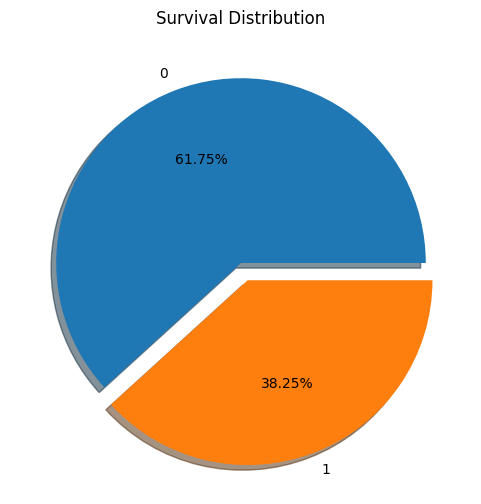

In [48]:
import matplotlib.pyplot as plt

# Switch to inline plotting for Google Colab
%matplotlib inline

# Plotting the pie chart
data.Survived.value_counts().plot(
    kind='pie',
    autopct="%0.2f%%",
    shadow=True,
    explode=[0, 0.1],  # Explode the second slice
    figsize=(6, 6)     # Optional: set figure size
)

plt.ylabel('')  # Remove the ylabel that sometimes appears with pie charts
plt.title('Survival Distribution')  # Add a title
plt.show()


In [45]:
data["Pclass"].value_counts()

,count
Pclass,
3,491
1,214
2,184


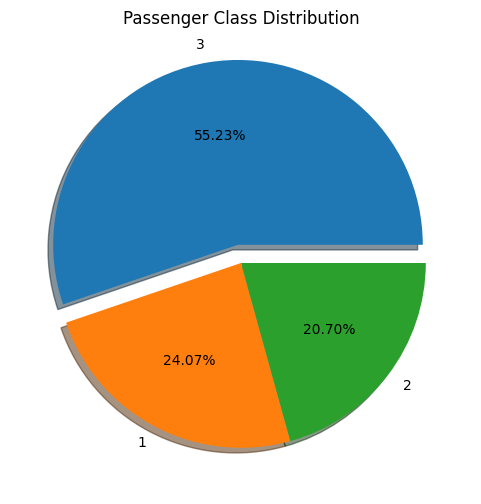

In [47]:
import matplotlib.pyplot as plt

# Switch to inline plotting for Google Colab
%matplotlib inline

# Plotting the pie chart
data.Pclass.value_counts().plot(
    kind='pie',
    autopct="%0.2f%%",
    shadow=True,
    explode=[0.1, 0, 0],  # Explode the first slice
    figsize=(6, 6)        # Optional: set figure size
)

plt.ylabel('')  # Remove ylabel that may appear
plt.title('Passenger Class Distribution')  # Add a title
plt.show()


In [49]:
data["Sex"].value_counts()

,count
Sex,
male,577
female,312


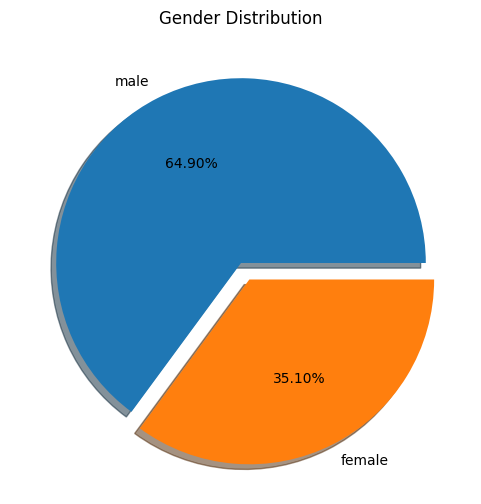

In [50]:
import matplotlib.pyplot as plt

# Switch to inline plotting for Google Colab
%matplotlib inline

# Plotting the pie chart
data.Sex.value_counts().plot(
    kind='pie',
    autopct="%0.2f%%",
    shadow=True,
    explode=[0, 0.1],  # Explode the second slice (adjust based on data)
    figsize=(6, 6)     # Optional: set figure size
)

plt.ylabel('')  # Remove the ylabel that appears with pie charts
plt.title('Gender Distribution')  # Add a title
plt.show()


In [51]:
data["Age"].max()

80.0

In [52]:
data["Age"].min()

0.42

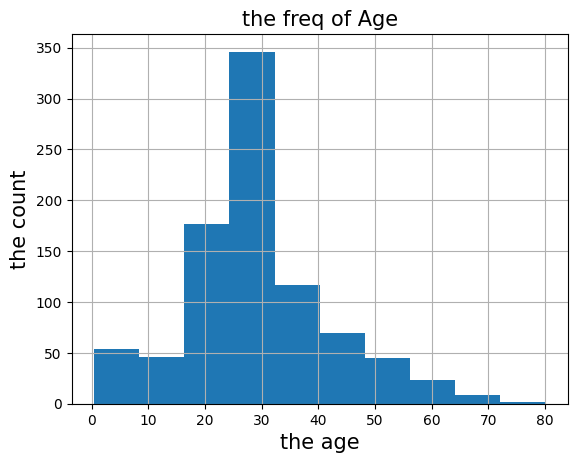

In [53]:
data.Age.hist()
plt.title("the freq of Age", fontsize=15)
plt.xlabel("the age", fontsize=15)
plt.ylabel("the count", fontsize=15)
plt.show()

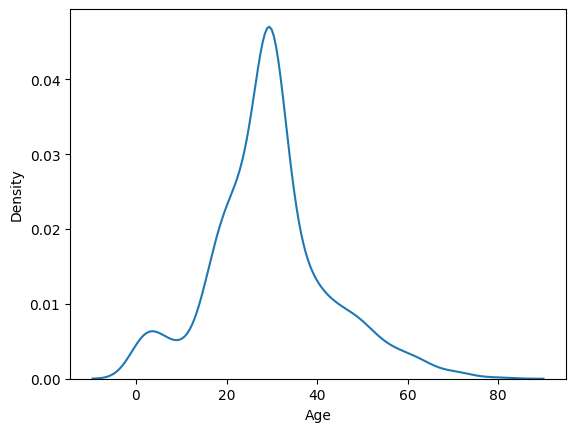

In [54]:
sns.distplot(data['Age'], hist=False)
plt.show()

In [55]:
data["SibSp"].value_counts()

,count
SibSp,
0,606
1,209
2,28
4,18
3,16
8,7
5,5


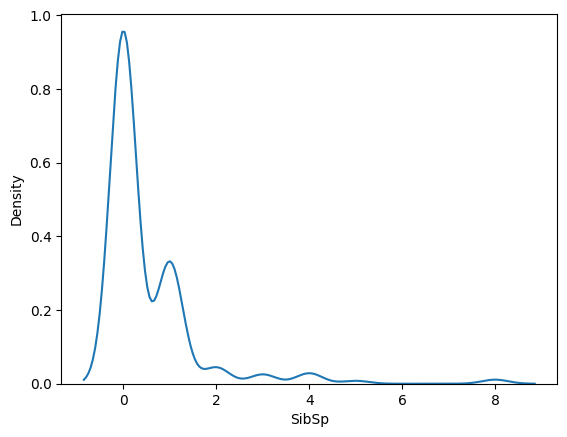

In [56]:
sns.distplot(data['SibSp'], hist=False)
plt.show()

In [57]:
data["Parch"].value_counts()

,count
Parch,
0,676
1,118
2,80
5,5
3,5
4,4
6,1


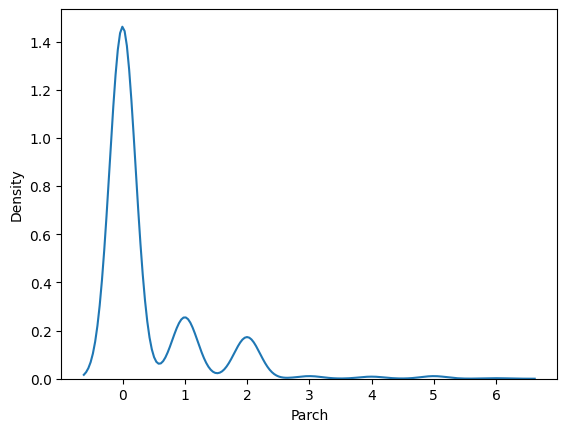

In [58]:
sns.distplot(data['Parch'], hist=False)
plt.show()

In [59]:
data["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [61]:
%matplotlib notebook
data.Embarked.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0.1,0,0])
plt.show()

<IPython.core.display.Javascript object>

In [62]:
data.groupby("Sex").agg({
    "Survived" : "value_counts"
})

Survived
Sex    Survived          
female 1              231
       0               81
male   0              468
       1              109

In [63]:
data.groupby(data["Survived"]).agg({
    "Age" : "mean"
})

,Age
Survived,
0,30.4151
1,28.4236


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

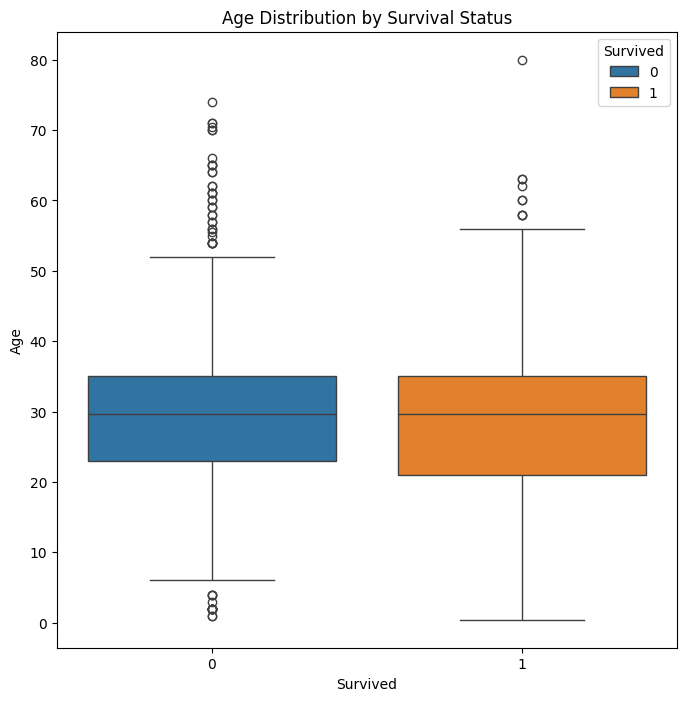

In [66]:
# Set up inline plotting
%matplotlib inline

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 8))

# Create the boxplot
sns.boxplot(x="Survived", y="Age", hue="Survived", data=data)

# Add a title (optional)
plt.title('Age Distribution by Survival Status')

# Show the plot
plt.show()


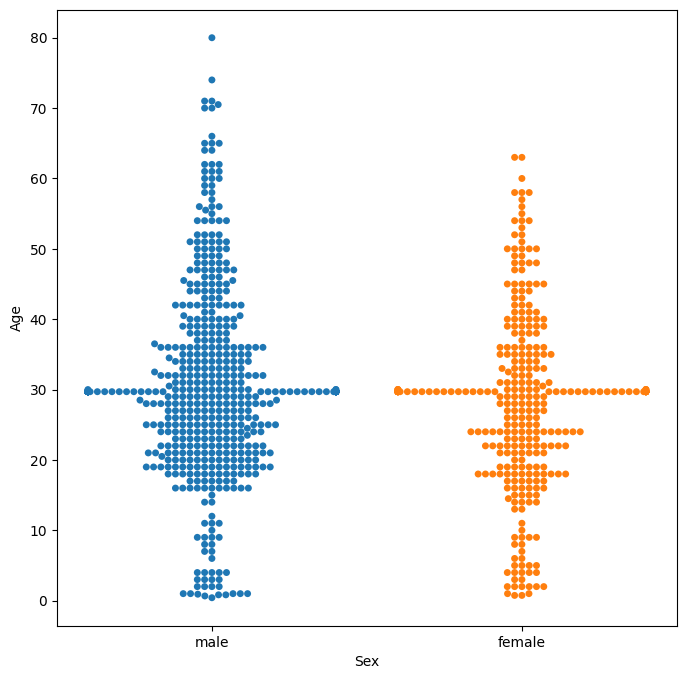

In [67]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex", y="Age",hue='Sex', data=data)
plt.show()


In [68]:
data.groupby("Pclass").agg({
    "Survived" : "value_counts"
})

Survived
Pclass Survived          
1      1              134
       0               80
2      0               97
       1               87
3      0              372
       1              119

In [69]:
data.groupby("Embarked").agg({
    "Survived" : "value_counts"
})

Survived
Embarked Survived          
C        1               93
         0               75
Q        0               47
         1               30
S        0              427
         1              217

In [70]:
data.groupby("SibSp").agg({
    "Survived" : "value_counts"
})

Survived
SibSp Survived          
0     0              398
      1              208
1     1              112
      0               97
2     0               15
      1               13
3     0               12
      1                4
4     0               15
      1                3
5     0                5
8     0                7

In [71]:
data.groupby(["Sex", "Pclass"]).agg({
    "Survived" : "value_counts"
})

Survived
Sex    Pclass Survived          
female 1      1               89
              0                3
       2      1               70
              0                6
       3      0               72
              1               72
male   1      0               77
              1               45
       2      0               91
              1               17
       3      0              300
              1               47

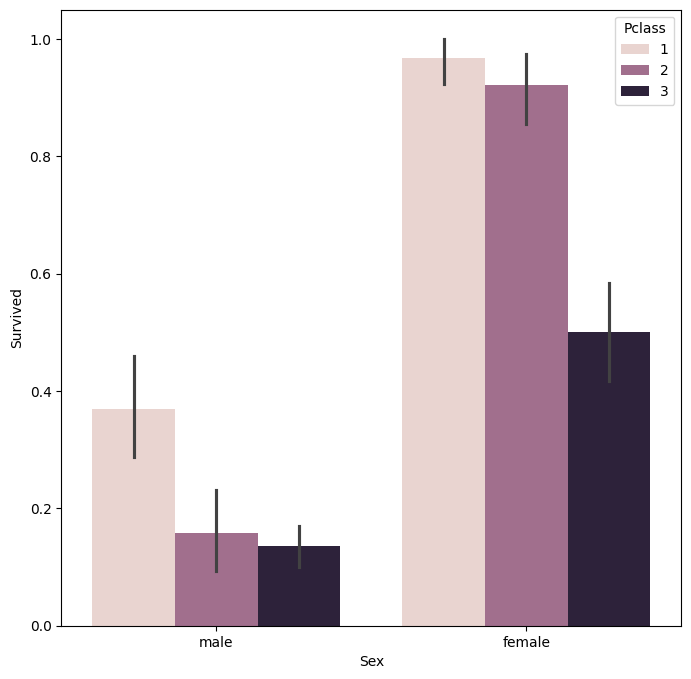

In [72]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data)
plt.show()

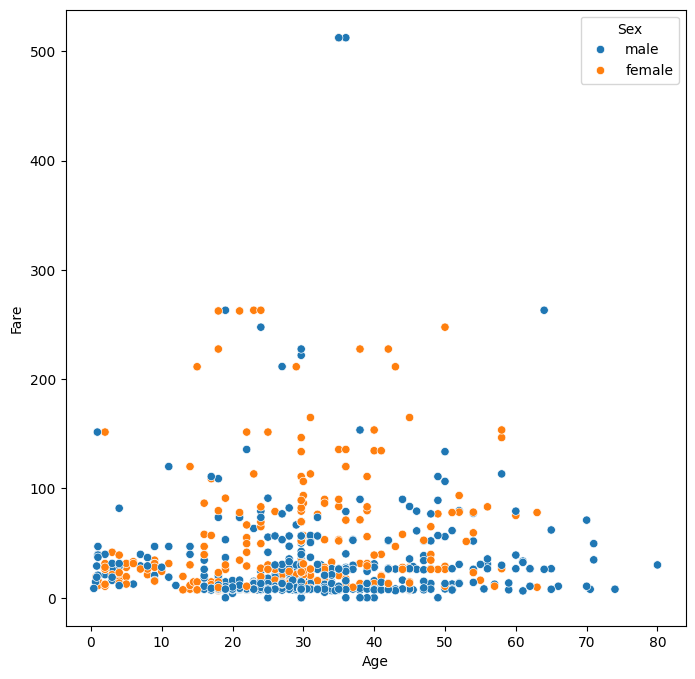

In [73]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=data)
plt.show()

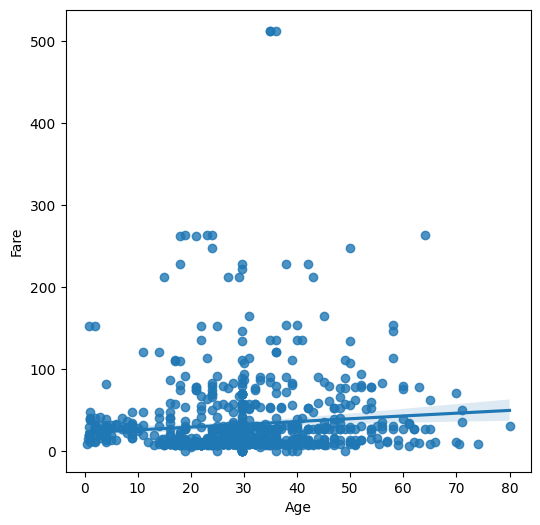

In [74]:
plt.subplots(figsize=(6, 6))
sns.regplot(x="Age", y="Fare", data=data)
plt.show()